https://rrighart.github.io/RExplor/

https://github.com/RRighart/RExplor

# R programming | Using R for Exploratory Analyses

## <span style="color:orange">ANALYSES AND R PROGRAMMING CODE</span>

Create a small dataset: 100m sprint

In [1]:
# Create a small dataset: 100m sprint
df<-data.frame(subject=as.factor(c("Pierre","Anne","Joyce","Peter","Alan","Camille")), age=as.numeric(c(20, 16, 19, 99, 23, 18)), sex=as.factor(c("M","F","F","M",NA,"F")), height=as.numeric(c(172, 181, 165, 168, 177, 178)), speed=as.numeric(c(11.20,3.00,11.50,10.35,10.98,13.05)))


In [2]:
# Check the data.frame df by simply typing in:
df



subject,age,sex,height,speed
Pierre,20,M,172,11.20
Anne,16,F,181,3.00
Joyce,19,F,165,11.50
Peter,99,M,168,10.35
Alan,23,NA,177,10.98
Camille,18,F,178,13.05


In [3]:
# The data has 6 rows and 5 columns:
dim(df)



[1] 6 5

In [4]:
# If you have very big data you may want to view only the first lines:
head(df, 4)



subject,age,sex,height,speed
Pierre,20,M,172,11.20
Anne,16,F,181,3.00
Joyce,19,F,165,11.50
Peter,99,M,168,10.35


In [5]:
# To inspect the structure of the data: 
str(df)



'data.frame':	6 obs. of  5 variables:
 $ subject: Factor w/ 6 levels "Alan","Anne",..: 6 2 4 5 1 3
 $ age    : num  20 16 19 99 23 18
 $ sex    : Factor w/ 2 levels "F","M": 2 1 1 2 NA 1
 $ height : num  172 181 165 168 177 178
 $ speed  : num  11.2 3 11.5 10.3 11 ...


In [6]:
# Some basic statistics can be given by the summary command:
summary(df)



    subject       age          sex        height          speed      
 Alan   :1   Min.   :16.00   F   :3   Min.   :165.0   Min.   : 3.00  
 Anne   :1   1st Qu.:18.25   M   :2   1st Qu.:169.0   1st Qu.:10.51  
 Camille:1   Median :19.50   NA's:1   Median :174.5   Median :11.09  
 Joyce  :1   Mean   :32.50            Mean   :173.5   Mean   :10.01  
 Peter  :1   3rd Qu.:22.25            3rd Qu.:177.8   3rd Qu.:11.43  
 Pierre :1   Max.   :99.00            Max.   :181.0   Max.   :13.05  

In [7]:
# To examine if missing values (NA) are in the data:
is.na(df)



subject,age,sex,height,speed
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE


In [8]:
# If you want the row and column index where NAs occur:
which(is.na(df), arr.ind=T)



row,col
5,3


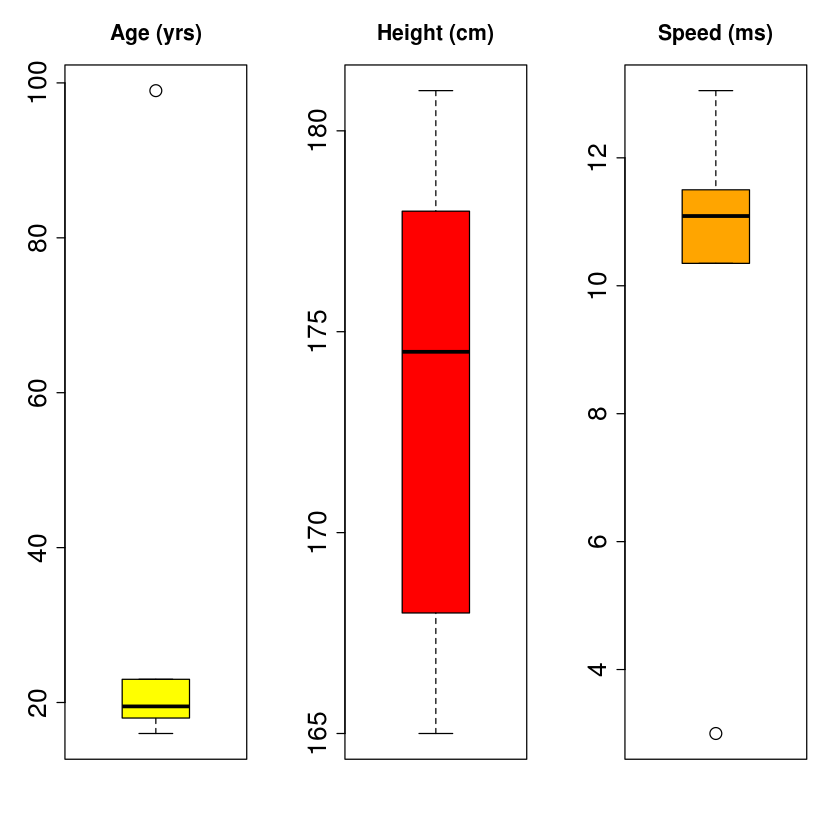

In [9]:
# We can use boxplots to see if there are impossible extreme values:
par(mfrow=c(1,3))
boxplot(df$age, main="Age (yrs)", cex.lab=2.0, cex.axis=2.0, cex.main=1.6, cex=2.0, col="yellow")
boxplot(df$height, main="Height (cm)", cex.lab=2.0, cex.axis=2.0, cex.main=1.6, cex=2.0, col="red")
boxplot(df$speed, main="Speed (ms)", cex.lab=2.0, cex.axis=2.0, cex.main=1.6, cex=2.0, col="orange")



In [10]:
# Finding & replacing the extreme values manually
# Compute the mean before we remove the outliers:
mean(df$age)



[1] 32.5

In [11]:
# Check if there are cases that are older than 40 years:
df$age>40



[1] FALSE FALSE FALSE  TRUE FALSE FALSE

In [12]:
# Replace the case(s) older than 40 with a missing value (NA).
df$age[df$age>40]<-NA



In [13]:
# Compute again the mean age, allowing to remove missing values (NAs):
mean(df$age, na.rm=TRUE)



[1] 19.2

In [14]:
# Inspecting mean age for male and female participants
aggregate(age ~ sex, data=df, FUN=mean, na.rm=TRUE)



sex,age
F,17.66667
M,20.00000


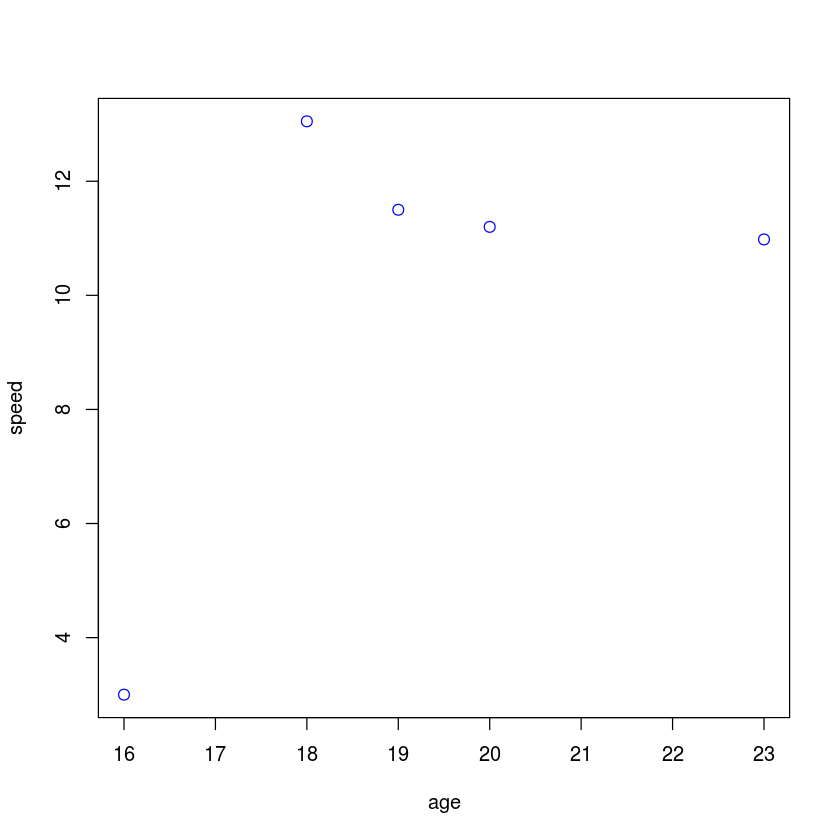

In [15]:
# Use a scatterplot to display the relation between age and speed:
par(mfrow=c(1,1))
plot(speed ~ age, data=df, col="blue", pch=1, cex=1.2)



# Quiz questions & answers
# Quiz Question I
### Replace the outlier of 3.00 ms in the variable *df$speed* with a NA.

In [16]:
# There are multiple solutions possible:

df$speed[df$speed==3.00]<-NA



In [17]:
# Another solution:

df[2,5]<-NA



In [18]:
# To verify that the value was indeed replaced by a NA use the command `is.na`:

is.na(df$speed)



[1] FALSE  TRUE FALSE FALSE FALSE FALSE

# Quiz Question II

### A dataset could erroneously have double records (duplicates). This is bad and should be removed. 
### Seeing the current dataset, what would be a way to discover duplicates in the variable df$subject?


In [19]:
# Check your solution for the following data.frame that contains double data:

df<-data.frame(subject=as.factor(c("Pierre","Anne","Joyce","Peter","Alan","Camille", "Pierre")), age=as.numeric(c(20, 16, 19, 99, 23, 18, 20)), sex=as.factor(c("M","F","F","M",NA,"F", "M")), height=as.numeric(c(172, 181, 165, 168, 177, 178, 172)), speed=as.numeric(c(11.20,3.00,11.50,10.35,10.98,13.05, 11.20)))



In [20]:
# Answer :
# A way to inspect for double records is to use the `table` function.

table(df$subject)




   Alan    Anne Camille   Joyce   Peter  Pierre 
      1       1       1       1       1       2 

In [21]:
# But still simpler, using the `summary` function would also display this:

summary(df)


    subject       age          sex        height          speed      
 Alan   :1   Min.   :16.00   F   :3   Min.   :165.0   Min.   : 3.00  
 Anne   :1   1st Qu.:18.50   M   :3   1st Qu.:170.0   1st Qu.:10.66  
 Camille:1   Median :20.00   NA's:1   Median :172.0   Median :11.20  
 Joyce  :1   Mean   :30.71            Mean   :173.3   Mean   :10.18  
 Peter  :1   3rd Qu.:21.50            3rd Qu.:177.5   3rd Qu.:11.35  
 Pierre :2   Max.   :99.00            Max.   :181.0   Max.   :13.05  